In [45]:
# run this on top of all of Your notebooks -- it does all the dirty imports.
exec(open('initialize_jupyter_handybeam.py').read())
import strathclyde

In [2]:
array_builder=strathclyde.LinearArray()

In [3]:
importlib.reload(strathclyde)
array_builder=strathclyde.LinearArray(
    radiation_frequency=40e3,
    sound_velocity=343,
    sampling_density=3,
    passive_aperture=64e-3,
    element_pitch=4.0e-3,
    element_width=None,
    element_count=16,
    focal_point=(0.0e-3,10.0e-3,50e-3))
array_builder

Basic linear probe:
> Environment:
>>   radiation frequency: 40.0kHz
>>   sound_velocity :343.0m/s
>>   sound wave length :8.575mm
>>   medium wavenumber: 116.6[waves/meter]
>>   point sources sampling density: 3pt/lambda linear, spacing of 2.858mm
  
> Probe definition:
>>   Passive aperture: 64.0mm
>>   element width: 2.000mm
>>   element count: 16
  
> Probe calculated properties:
>>   inter-element gap: 2.0mm
>>   Active aperture: 64.0mm
>>   Active aperture near field transition: 119.4mm
>>   Passive aperture near field transition: 119.4mm
>>   Active aperture near field transition: 119.4mm
  
> Focal point calculated properties:
>>   focal distance: 51.0mm
>>   active aperture -6dB focal spot size: 7.0mm
>>   passive aperture -6dB natural focus spot size: 16.3mm

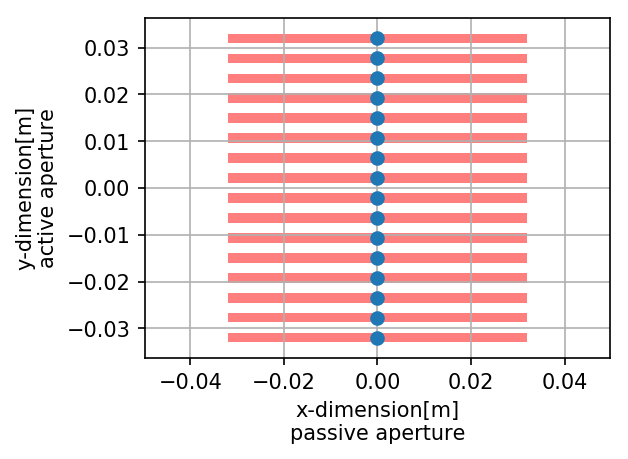

In [4]:
array_builder.visualize_array_elements() # visualize with output to screen
array_builder.visualize_array_elements(filename='example_visualize_array_elements.png') # save figure to disk

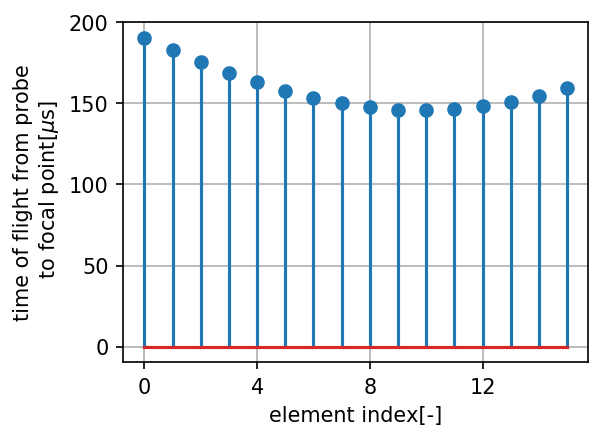

In [5]:
array_builder.visualize_time_of_flight() # visualize with output to screen
array_builder.visualize_time_of_flight(filename='example_visualize_time_of_flight.png') # save figure to disk

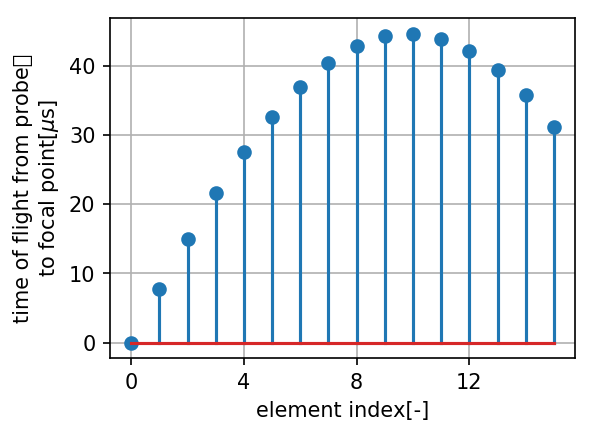

In [6]:
array_builder.visualize_focal_laws()
array_builder.visualize_focal_laws(filename='example_visualize_focal_laws.png')

In [7]:
print(array_builder.export_focal_laws_to_onscale(filename="onscale_focal_laws.txt"))


symb tshift0 = 0.000000e+00
symb eweight0 = 1.000000e+00
symb tshift1 = 7.752282e-06
symb eweight1 = 1.000000e+00
symb tshift2 = 1.496422e-05
symb eweight2 = 1.000000e+00
symb tshift3 = 2.156654e-05
symb eweight3 = 1.000000e+00
symb tshift4 = 2.748511e-05
symb eweight4 = 1.000000e+00
symb tshift5 = 3.264294e-05
symb eweight5 = 1.000000e+00
symb tshift6 = 3.696327e-05
symb eweight6 = 1.000000e+00
symb tshift7 = 4.037373e-05
symb eweight7 = 1.000000e+00
symb tshift8 = 4.281122e-05
symb eweight8 = 1.000000e+00
symb tshift9 = 4.422705e-05
symb eweight9 = 1.000000e+00
symb tshift10 = 4.459145e-05
symb eweight10 = 1.000000e+00
symb tshift11 = 4.389657e-05
symb eweight11 = 1.000000e+00
symb tshift12 = 4.215731e-05
symb eweight12 = 1.000000e+00
symb tshift13 = 3.940976e-05
symb eweight13 = 1.000000e+00
symb tshift14 = 3.570764e-05
symb eweight14 = 1.000000e+00
symb tshift15 = 3.111752e-05
symb eweight15 = 1.000000e+00



In [10]:
# these are avaliable properties and methods
dir(array_builder)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'active_aperture',
 'active_aperture_focus_power_estimate',
 'active_aperture_near_field',
 'create_handybeam_world',
 'create_point_cloud_all_elements',
 'create_point_cloud_for_array_element',
 'dx_simulation',
 'element_centre_locations',
 'element_count',
 'element_gap',
 'element_pitch',
 'element_width',
 'export_focal_laws_to_onscale',
 'focal_distance',
 'focal_laws_delays',
 'focal_laws_gains',
 'focal_laws_phases',
 'focal_point',
 'focusing_power_estimate',
 'passive_aperture',
 'passive_aperture_focus_power_estimage',
 'passive_aperture_near_field',
 'radiation_frequency',
 'radiation_period',
 'sampling_densi

In [8]:
#??array_builder.focal_distance

# -=========== FRONTIER ============
Things below this line need development  ------



In [57]:
handybeam_world=array_builder.create_handybeam_world()
built_array=handybeam_world.tx_array

In [58]:
handybeam_world

world = handybeam.world.World(frequency=self.radiation_frequency, sound_velocity=self.sound_velocity)
handybeam.world.World() with sound velocity of 343.0m/s, frequency 40.0kHz, medium_wavelength of 8.575mm, wavenumber 116.618, 0 sampler(s)
Tx array: Strathclyde style linear array, subsampled, 16 real elements

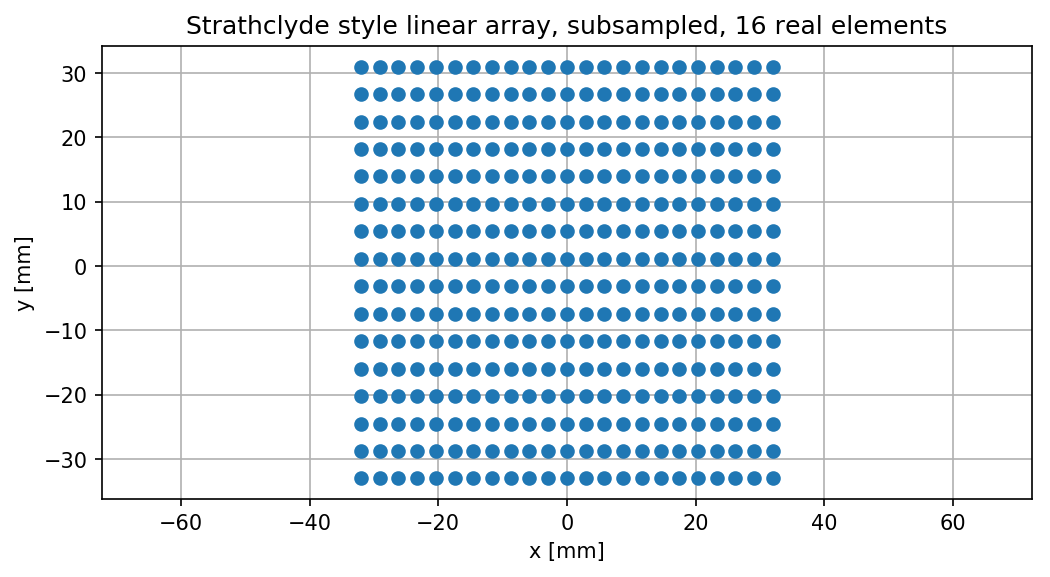

In [59]:
handybeam_world.tx_array.visualise()

In [60]:
handybeam_world.tx_array.tx_array_element_descriptor.shape

(368, 16)

In [61]:
# Set grid spacing per wavelength for rectilinear sampling grid.

grid_spacing_per_wavelength = 0.1

# Set grid extent around the origin.

grid_extent_around_origin_x = 0.2
grid_extent_around_origin_y = 0.2

# Set plane height 

focal_plane_height = 200e-3

In [62]:
# Add a rectilinear sampling grid to the world.

rectilinear_sampler = \
    handybeam_world.add_sampler(
    handybeam.samplers.rectilinear_sampler.RectilinearSampler(
        parent = handybeam_world,
        origin = np.array((0,0,focal_plane_height)),
        grid_spacing_per_wavelength = grid_spacing_per_wavelength,
        grid_extent_around_origin_x = grid_extent_around_origin_x,
        grid_extent_around_origin_y = grid_extent_around_origin_y,
        normal_vector=np.array((1,0,0)),
        parallel_vector=np.array((0,-1,0)),
        local_work_size=(1,1,1)
    ))

In [63]:
handybeam_world.tx_array=handybeam.tx_array_library.simple_linear(element_count=7)
rectilinear_sampler.propagate(print_performance_feedback=True)

profiling: info:
profiling: wall time: 0.0273[sec] == 36.6[FPS]
profiling: kernel time : 11074.6[us] == 90.3[FPS]
profiling: compute performance: 137.8[MRays/sec]
profiling: memcopy time: 1684.9[us] == 593.5[FPS]
profiling: memcopy bandwidth: 2.4[GB/sec]
profiling: command bandwidth: 101461.0[CPS]


In [64]:
rectilinear_sampler

RectilinearSampler: 467x467 points, spacing 0.857mm

In [65]:
rectilinear_sampler.pressure_field

array([[ 0.12421037+5.281451j  ,  1.5741417 +5.0921106j ,
         2.9234266 +4.5089464j , ...,  4.1228805 +3.5121858j ,
         2.9950273 +4.4644265j ,  1.6551186 +5.0693154j ],
       [ 2.9174662 +4.3884554j ,  4.042865  +3.4560595j ,
         4.872813  +2.243575j  , ...,  5.35512   +0.76009685j,
         4.90989   +2.167678j  ,  4.09906   +3.393388j  ],
       [ 4.7960415 +2.1483731j ,  5.2516456 +0.76085025j,
         5.307029  -0.70680255j, ...,  4.923348  -2.2188823j ,
         5.2976394 -0.7906121j ,  5.265706  +0.6779948j ],
       ...,
       [ 3.296216  -4.9288526j , -0.23280486-5.95082j   ,
        -3.7031922 -4.6970468j , ..., -5.838557  -1.4207499j ,
        -3.8703725 -4.562164j  , -0.4464546 -5.9399962j ],
       [ 3.2962642 -5.003797j  , -0.27728003-6.011898j  ,
        -3.7758179 -4.7204576j , ..., -5.910971  -1.3943148j ,
        -3.943774  -4.5830975j , -0.49305123-5.999533j  ],
       [ 3.3106902 -5.071462j  , -0.30557814-6.075797j  ,
        -3.8367128 -4.755807j 

In [66]:
print(handybeam_world.tx_array.tx_array_element_descriptor[0,:])
handybeam_world.tx_array.tx_array_element_descriptor.shape

[ 0.00000e+00 -2.10245e-02  0.00000e+00  0.00000e+00  0.00000e+00
  1.00000e+00  0.00000e+00  3.18500e+02 -6.82400e+02  4.61330e+02
  1.00000e+00  0.00000e+00          nan          nan          nan
          nan]


(7, 16)

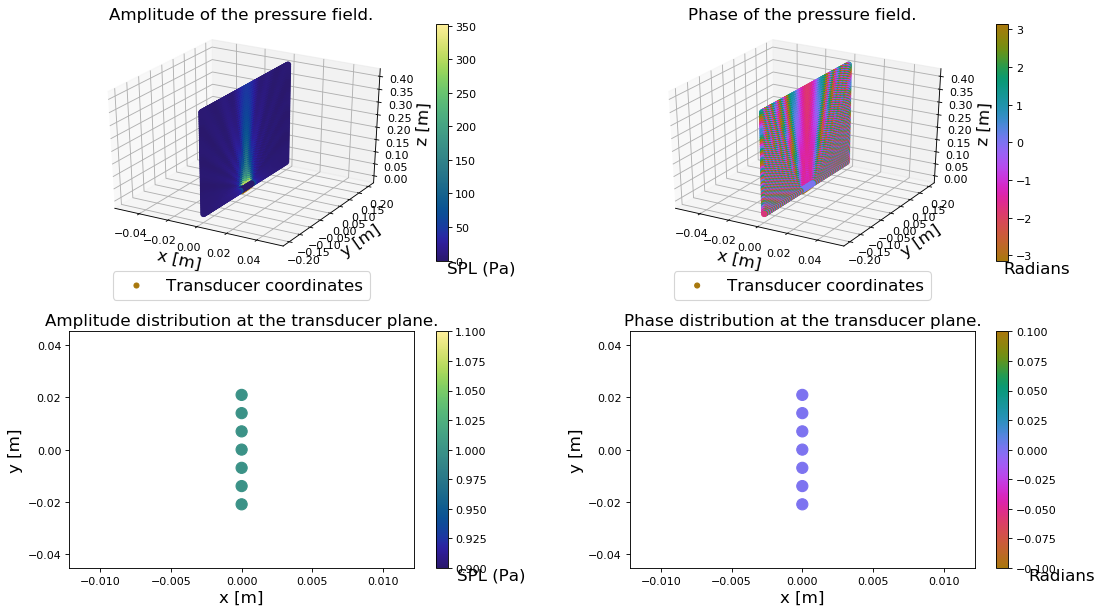

In [67]:
# Visualise the result

rectilinear_sampler.visualise_all_in_one()

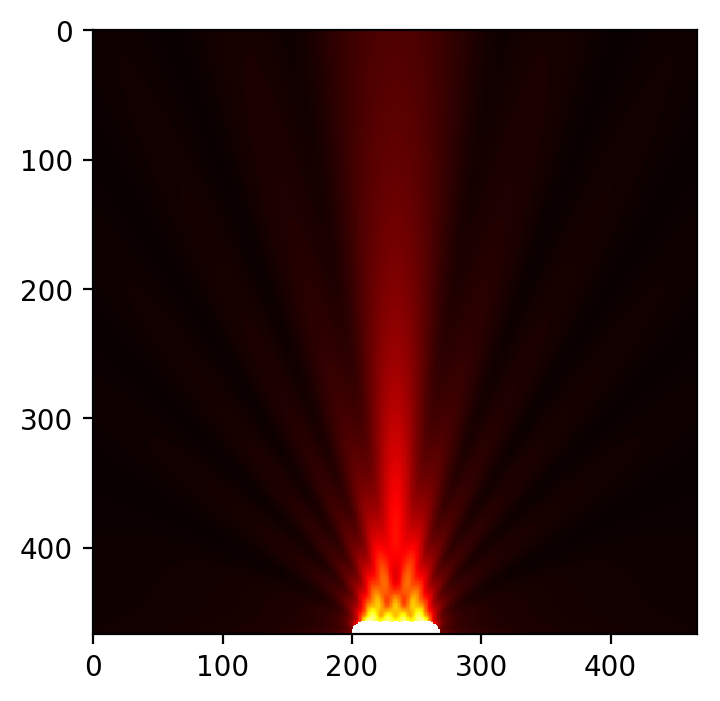

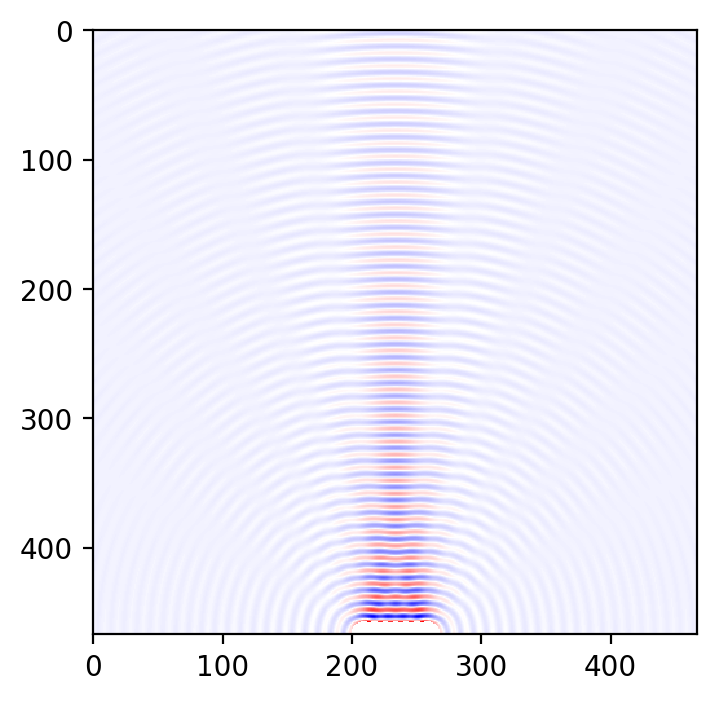

In [68]:
plt.figure(figsize=(8,4),dpi=200)
plt.imshow(np.abs(rectilinear_sampler.pressure_field),cmap='hot')
plt.figure(figsize=(8,4),dpi=200)
plt.imshow(np.real(rectilinear_sampler.pressure_field),cmap='bwr')

In [ ]:
rectilinear_sampler.pressure_field

In [ ]:
import handybeam.cl_system

In [ ]:
handybeam.cl_system.print_cl_platforms()

In [ ]:
world

In [ ]:
np.empty((0,3))

In [ ]:
np.ones(shape=(3,1))

In [ ]:
point_nan_list = np.fill(np.empty(shape=(4,1)), np.NaN)

In [ ]:
# Initialise solver object.
# ! Do not run this solver on the pre-generated array! it will ruin it.
# solver = handybeam.solver.Solver(parent = world)
# Instruct the solver to solve for the activation coefficients.
# solver.single_focus_solver(x_focus = 0.00, y_focus = 0, z_focus = focal_plane_height) 